In [9]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import h5py
from math import pi

from analysis.config import birds, h5_path_dict, pickle_dir
from analysis.ExpData import ExpData
from analysis.utils import popln_overlap, get_fr

In [10]:
with open(pickle_dir / 'population_patterns_checks_long.p', 'rb') as f: 
    population_patterns = pickle.load(f)

### Cache v Retrieval of Same Cache

In [11]:
cache_reactiv_vectors = []
cache_details = []
retriev_reactiv_vectors = []
retriev_details = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_hops = population_patterns[fil_string]['c_hops']
    r_hops = population_patterns[fil_string]['r_hops']
    noncrch_hops = population_patterns[fil_string]['noncrch_hops']
    hop_patterns = population_patterns[fil_string]['hop_patterns']
    hop_times = population_patterns[fil_string]['hop_times']
    hop_details = population_patterns[fil_string]['hop_details'] # start, peak, end, len

    for i, c_hop in enumerate(c_hops):
        c_site = exp_data.event_sites[exp_data.cache_event][i]
        cache_pattern_mat = hop_patterns[c_hop]
        for j, r_hop in enumerate(r_hops):
            if r_hop <= c_hop: continue
            r_site = exp_data.event_sites[exp_data.retriev_event][j]
            if r_site != c_site: continue
            retriev_pattern_mat = hop_patterns[r_hop]
            overlap_matrix = []
            for retriev_pattern in retriev_pattern_mat.T:
                cache_retriev_overlap = popln_overlap(
                    cache_pattern_mat, retriev_pattern
                    )
                overlap_matrix.append(cache_retriev_overlap)
            overlap_matrix = np.array(overlap_matrix)
            cache_reactiv_vector = np.nanmax(overlap_matrix, axis=0)
            retriev_reactiv_vector = np.nanmax(overlap_matrix, axis=1)
            cache_reactiv_vectors.append(cache_reactiv_vector)
            retriev_reactiv_vectors.append(retriev_reactiv_vector)
            cache_details.append(hop_details[c_hop, :])
            retriev_details.append(hop_details[r_hop, :])
            break
cache_reactiv_vectors = np.array(cache_reactiv_vectors)
cache_details = np.array(cache_details)
retriev_reactiv_vectors = np.array(retriev_reactiv_vectors)
retriev_details = np.array(retriev_details)

/home/chingf/Code/cache-arena-analysis/analysis/utils.py:49: RuntimeWarning: invalid value encountered in true_divide
  dist = adotb/(asumsq + bsumsq - adotb)
/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: All-NaN slice encountered


In [12]:
window_size = 100

In [13]:
cache_reactiv_vectors = np.array(cache_reactiv_vectors)
cache_details = np.array(cache_details)

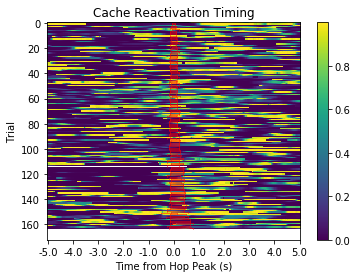

In [19]:
sorting = np.argsort(cache_details[:,3]).squeeze()
plt.figure()
normed_cache_reactiv_vectors = []
for vec in cache_reactiv_vectors:
    normed_cache_reactiv_vectors.append(vec)#/np.linalg.norm(vec))
normed_cache_reactiv_vectors = np.array(normed_cache_reactiv_vectors)
plt.imshow(normed_cache_reactiv_vectors[sorting])
for row, hop_detail in enumerate(cache_details[sorting]):
    start = hop_detail[0]
    peak = hop_detail[1]
    end = hop_detail[2]
    plt.plot([start, end], [row, row], "r", linewidth=0.5)
    plt.plot([end, end], [row, row + 1], "r", linewidth=0.5)
    plt.plot([start, start], [row, row + 1], "r", linewidth=0.5)
plt.ylabel("Trial")
plt.xlabel("Time from Hop Peak (s)")
plt.xticks(np.arange(0, window_size*2+1, 20), (np.arange(0, window_size*2+1, 20) - window_size)/20)
plt.title("Cache Reactivation Timing")
plt.colorbar()
#plt.savefig("timing.png", dpi=200)
plt.show()

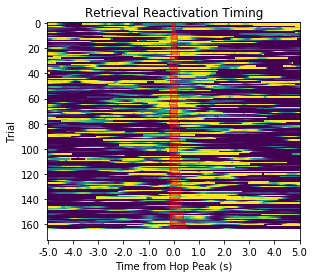

In [15]:
retriev_reactiv_vectors = np.array(retriev_reactiv_vectors)
retriev_details = np.array(retriev_details)
sorting = np.argsort(retriev_details[:,3]).squeeze()
plt.figure()   
plt.imshow(retriev_reactiv_vectors[sorting])
for row, hop_detail in enumerate(retriev_details[sorting]):
    start = hop_detail[0]
    peak = hop_detail[1]
    end = hop_detail[2]
    plt.plot([start, end], [row, row], "r", linewidth=0.5)
    plt.plot([end, end], [row, row + 1], "r", linewidth=0.5)
    plt.plot([start, start], [row, row + 1], "r", linewidth=0.5)
plt.ylabel("Trial")
plt.xlabel("Time from Hop Peak (s)")
plt.xticks(np.arange(0, window_size*2+1, 20), (np.arange(0, window_size*2+1, 20) - window_size)/20)
plt.title("Retrieval Reactivation Timing")
plt.savefig("timing_r.png", dpi=200)
plt.show()

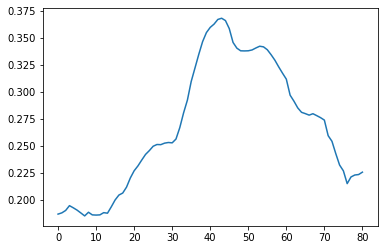

In [24]:
plt.plot(np.nanmean(retriev_reactiv_vectors, axis=0))

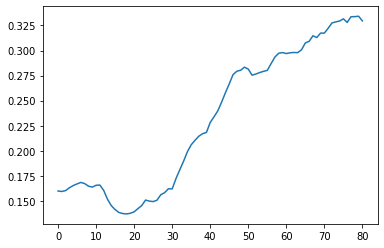

In [25]:
plt.plot(np.nanmean(cache_reactiv_vectors, axis=0))